In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import R2Score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

    Load the dataset ../data/housing-data.csv

    plot the histograms for each feature
    create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
    create a linear regression model in Keras with the appropriate number of inputs and output
    split the data into train and test with a 20% test size
    train the model on the training set and check its accuracy on training and test set
    how's your model doing? Is the loss growing smaller?
    try to improve your model with these experiments:
        normalize the input features with one of the rescaling techniques mentioned above
        use a different value for the learning rate of your model
        use a different optimizer
    once you're satisfied with training, check the R2score on the test set

In [3]:
df = pd.read_csv('../data/housing-data.csv')

In [5]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [4]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [49]:
ss = StandardScaler()
df['sqft_ss'] = ss.fit_transform(df[['sqft']])
df['bdrms_ss'] = ss.fit_transform(df[['bdrms']])
df['age_ss'] = ss.fit_transform(df[['age']])
df['price_ss'] = ss.fit_transform(df[['price']])

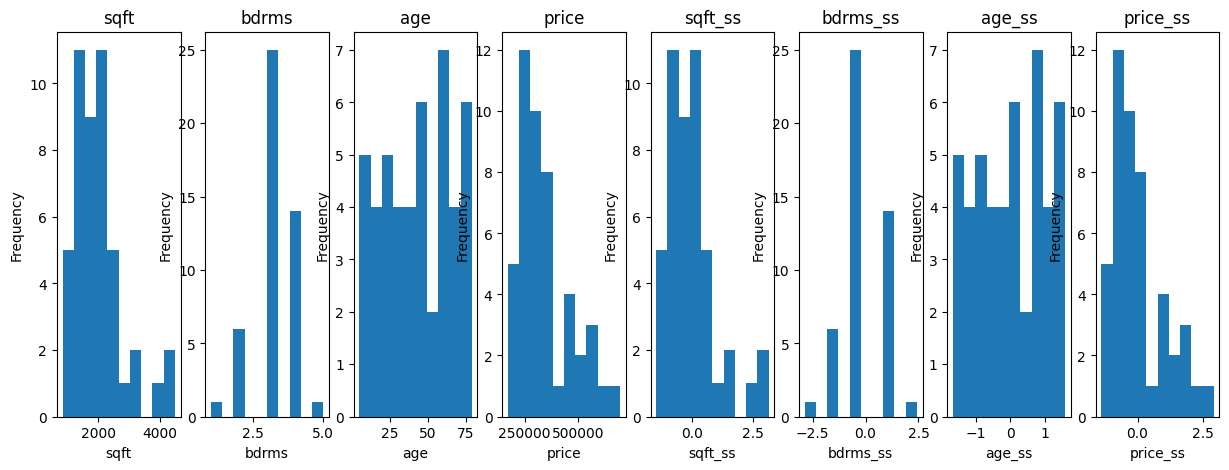

In [50]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(df.columns):
    plt.subplot(1,8, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)


In [51]:
X = df[['sqft_ss','bdrms_ss','age_ss']].values
y = df['price_ss'].values

In [52]:
model = Sequential()
model.add(Dense(1,input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

/Users/thomascampbell/code/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
model.fit(X_train, y_train, epochs=40, verbose=0)

In [55]:
results = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6576


In [56]:
results

0.6576319932937622

In [57]:
y_predict = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [58]:
metric = R2Score(num_regressors=3)
metric.update_state(y_test, y_predict)

In [59]:
results = metric.result()

In [60]:
results

<tf.Tensor: shape=(), dtype=float32, numpy=-0.17431318759918213>